In [1]:
from typing import List, Tuple
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal

In [2]:
n_points = 100

def generate_dataset():
    data = np.concatenate((
        np.random.normal(1,2,n_points),
        np.random.normal(8,2,n_points)
    ))
    classes = [0 for i in range(n_points)] + [1 for i in range(n_points)]
    return data, classes

In [3]:
x, y = generate_dataset()

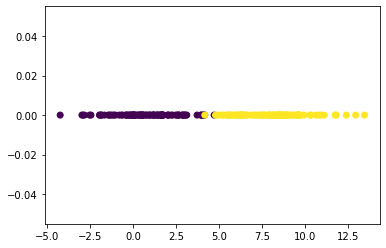

In [4]:
plt.scatter(x, [0 for i in range(2*n_points)], c=y)
plt.show()

In [6]:
class GaussianMixtureModel:
    def __init__(self, n_cluster: int = 8, max_iter: int = 1_000):
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.gaussians: List[Tuple[float, float, float]] = []
    
    def prob(self, point: np.ndarray, gaussian: Tuple[float, float, float]):
        p = norm.pdf(point, gaussian[0], gaussian[1])
        return p
    
    def fit(self, x: np.ndarray):
        N = x.shape[0]
        #init model
        self.gaussians = [[] for _ in range(self.n_cluster)]
        self.cluster_probs = np.zeros((N, self.n_cluster))
        for c in range(self.n_cluster):
            mean = np.random.choice(x)
            std = 2.0
            prob = 1 / self.n_cluster
            self.gaussians[c] = [mean, std, prob]
        
        #start trianing
        for _ in range(self.max_iter):
            #step 1: expectation
            for i, point in enumerate(x):
                for c in range(self.n_cluster):
                    # i = 0
                    # bsp: c0: 0.7, c1: 0.2, c2: 0.1
                    self.cluster_probs[i][c] = self.gaussians[c][2] * self.prob(point, self.gaussians[c])
                
                self.cluster_probs[i] /= np.sum(self.cluster_probs[i])
            #step 2: maximization
            for c in range(self.n_cluster):
                #cluster mean
                # bsp:
                #       2,      3,      1
                # c0:   0.5     0.6     0.2
                # 2*0.5 + 3*0.6 +1 *0.2 = 3 / 3 = 1
                self.gaussians[c][0] = np.average(x, weights=self.cluster_probs[:, c])
                #cluster std
                self.gaussians[c][1] = 2.0
                #cluster prob
                self.gaussians[c][2] = np.mean(self.cluster_probs[:, c])
        return self.gaussians



In [7]:
n_cluster = 2
max_iter = 200

gmm = GaussianMixtureModel(
    n_cluster=n_cluster,
    max_iter=max_iter
)
gaussians = gmm.fit(x)

In [8]:
means = [
    gaussians[0][0],
    gaussians[1][0]
]

print(f"True Mean 1: {1}")
print(f"True Mean 2: {8}")

print(f"Estimated Mean 1: {means[0]}")
print(f"Estimated Mean 2: {means[1]}")

True Mean 1: 1
True Mean 2: 8
Estimated Mean 1: 7.9725231776521115
Estimated Mean 2: 0.8261708389850709


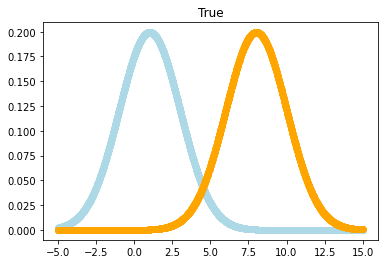

In [10]:
y1 = [norm.pdf(xi, 1, 2) for xi in np.arange(-5, 15, 0.01)]
plt.scatter(np.arange(-5, 15, 0.01),y1, color="lightblue")

y2 = [norm.pdf(xi, 8, 2) for xi in np.arange(-5, 15, 0.01)]
plt.scatter(np.arange(-5, 15, 0.01),y2, color="orange")

plt.title("True")
plt.show()

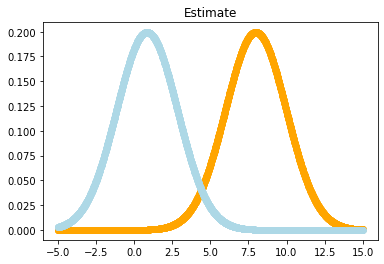

In [12]:
y1 = [norm.pdf(xi, means[0], 2) for xi in np.arange(-5, 15, 0.01)]
plt.scatter(np.arange(-5, 15, 0.01),y1, color="orange")

y2 = [norm.pdf(xi, means[1], 2) for xi in np.arange(-5, 15, 0.01)]
plt.scatter(np.arange(-5, 15, 0.01),y2, color="lightblue")

plt.title("Estimate")
plt.show()